# Performance Metrics Hands-On Exercise

This hands-on exercise encourages the utilization of different evaluation metrics using this dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Instructions:
 1. Fork the given repository
 2. Rename 'Exercise.ipynb' to '( lastname ).ipynb'
 3. Load the given dataset
 4. For No. 2-4, preprocess the dataset then construct, train, and evaluate a **classification** model (You may experiment in this step)
 5. For No. 5-7, preprocess the dataset then construct, train, and evaluate a **regression** model (You may experiment in this step)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 1. Load the Data

In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 2. Preprocess the Data (Classification)

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_data = ['address', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic']

for col in categorical_data:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,GP,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,GP,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,GP,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,GP,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [4]:
X = df.drop(['school'], axis=1)
y = df['school']
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y = y.map(label_mapping)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 3. Construct and Train the Model (Classification)

In [6]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### 4. Evaluate the Model (Classification)

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[68,  0],
       [10,  1]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        68
           1       1.00      0.09      0.17        11

    accuracy                           0.87        79
   macro avg       0.94      0.55      0.55        79
weighted avg       0.89      0.87      0.83        79



### 5. Preprocess the Data (Regression)

In [10]:
df['school'] = label_encoder.fit_transform(df['school'])
X = df.drop(['G3'], axis=1)
y = df['G3']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train)
X_test_reg = scaler.transform(X_test)

### 6. Construct and Train the Model (Regression)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_reg, y_train)

LinearRegression()

### 7. Evaluate the Model (Regression)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', lr_mse)

lr_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', lr_mae)

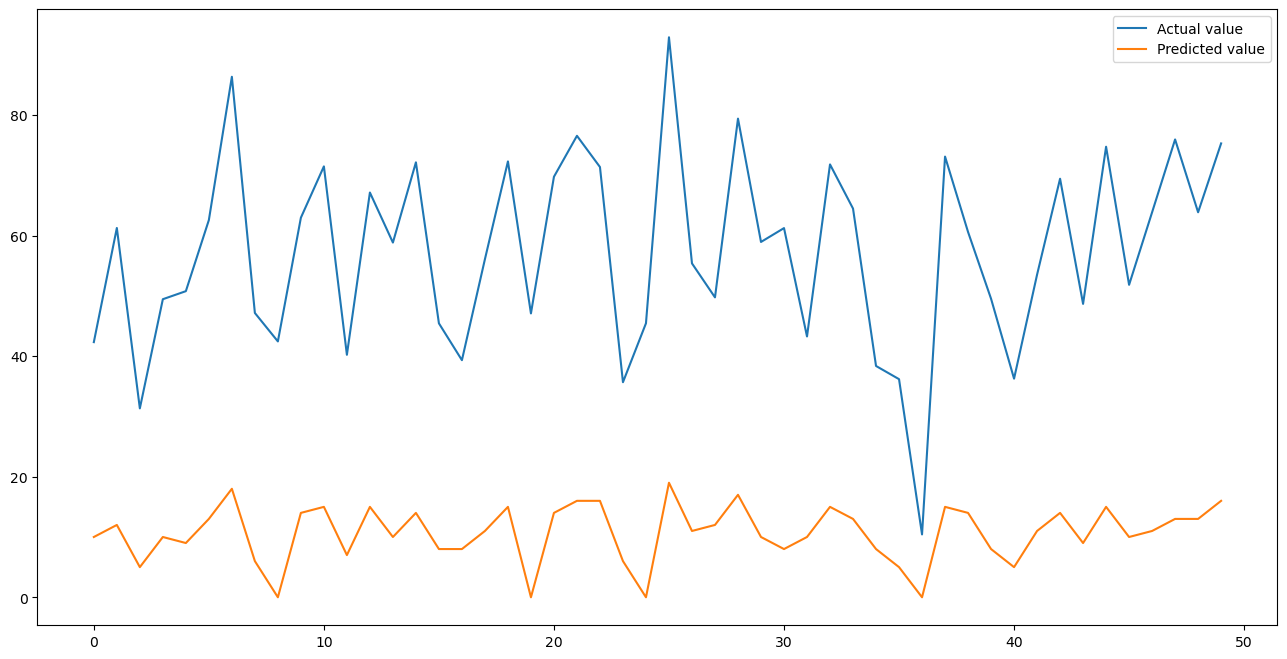

In [15]:
test = pd.DataFrame({'Predicted value': y_pred, 'Actual value': y_test})
fig = plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual value', 'Predicted value'])
plt.show()